In [1]:
import pandas as pd
import seaborn as sns

### Training Strategy: 1-Stage vs. 2-Stage

In [7]:
df = pd.read_excel('training_strategy.xlsx', usecols='A,B,C')
epoch, stage1_acc, stage2_acc = df['Epoch'].tolist(), df['1-Stage']*100, df['2-Stage']*100 

stage1_acc = stage1_acc.tolist()
stage2_acc = stage2_acc.tolist()

dict = {
    'Epoch': epoch + epoch,
    'Accuracy (%)': stage1_acc + stage2_acc,
    'Strategy': ['1-Stage']*300 + ['2-Stage']*300,
}
data = pd.DataFrame(data=dict, columns=['Epoch', 'Accuracy (%)', 'Strategy'])

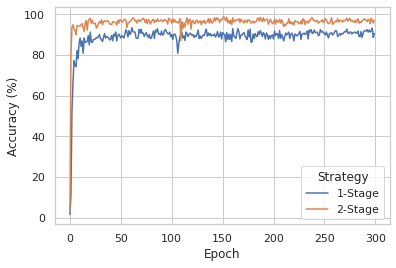

In [8]:
sns.set_theme(style="whitegrid")
lineplot = sns.lineplot(data=data, x='Epoch', y='Accuracy (%)', hue='Strategy')#.set_title('Training Loss using Different Modailities of Data')

In [9]:
lineplot.figure.savefig('images/stage1_vs_stage2.pdf', dpi=400.0, bbox_inches='tight')

### Learning Efficiency

In [10]:
df = pd.read_excel('learning_efficiency.xlsx', usecols='A,C,E,G,I,K')
epoch, alexnet, resnet18 = df['Epoch'].tolist(), df['AlexNet'].tolist(), df['ResNet18'].tolist()
resnet34, resnet50, vgg11 = df['ResNet34'].tolist(), df['ResNet50'].tolist(), df['VGG11'].tolist()

dict = {
    'Epoch': epoch * 5,
    'Accuracy (%)': alexnet + vgg11 + resnet18 + resnet34 + resnet50,
    'Initializer': ['AlexNet']*300 + ['VGG11']*300 + ['ResNet18']*300 + ['ResNet34']*300 + ['ResNet50']*300,
}
data = pd.DataFrame(data=dict, columns=['Epoch', 'Accuracy (%)', 'Initializer'])

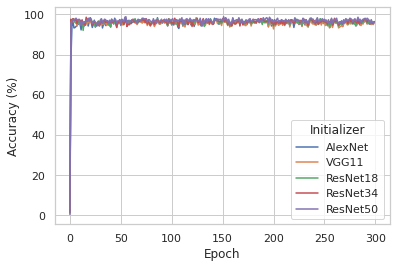

In [11]:
sns.set_theme(style="whitegrid")
lineplot = sns.lineplot(data=data, x='Epoch', y='Accuracy (%)', hue='Initializer')#.set_title('Training Loss using Different Modailities of Data')

In [23]:
lineplot.figure.savefig('images/learning_efficiency.pdf', dpi=400.0, bbox_inches='tight')

### Learning Rate Curve

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

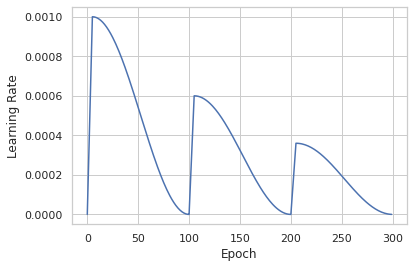

In [32]:
# Set the font family to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Set the font size to 10 points
mpl.rcParams['font.size'] = 10

period = 190
frequency = (2*np.pi) / period

peak1 = 0.001
slope1 = peak1 / 5

x1 = list(range(5))
y1 = [slope1 * val for val in x1]
x2 = np.array(range(5, 100))
y2 = peak1 * 0.5 * (np.cos(frequency*(x2-5)) + 1)

peak2 = 0.0006
slope2 = peak2 / 5

x3 = list(range(100, 105))
y3 = [slope2 * (val-100) for val in x3]
x4 = np.array(range(105, 200))
y4 = peak2 * 0.5 * (np.cos(frequency*(x4-105)) + 1)

peak3 = 0.00036
slope3 = peak3 / 5

x5 = list(range(200, 205))
y5 = [slope3 * (val-200) for val in x5]
x6 = np.array(range(205, 300))
y6 = peak3 * 0.5 * (np.cos(frequency*(x6-205)) + 1)

x = x1 + x2.tolist() + x3 + x4.tolist() + x5 + x6.tolist()
y = y1 + y2.tolist() + y3 + y4.tolist() + y5 + y6.tolist()

plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.plot(x, y)

plt.savefig('images/vf_learning_rate.pdf', dpi=400.0, bbox_inches='tight')